# Burgers 방정식

**강좌**: *기초 전산유체역학*

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

## Burgers 방정식
Burgers 방정식은 다음과 같이 표현된다.

$$
u_t + \left ( \frac{u^2}{2} \right )_x = 0.
$$

비 보존형의 경우 다음과 같이 표현할 수 있다.

$$
u_t + u u_x = 0.
$$

이 방정식은 운동량 보존식에서 비선형 항만 표현한 식이다.

선형 파동 방정식과 비교했을 때, 각 지점에서 교란의 전파 속도는 $u$ 이다. 즉 $x-t$ 그래프에서 Characteristic의 기울기가 해 $u$ 에 따라 달라진다.

In [2]:
x = np.linspace(0, 3, 151)
u = 1+ 0.25*np.sin(np.pi*x)
t = np.linspace(0, 1, 101)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, u)
axs[0].set_xlim(-0.1, 3)
axs[0].set_ylabel('u')
axs[0].set_ylim(-0.1, 1.3)
axs[0].set_xlabel('x')

for i in range(15):
    xi, ui = x[10*i], u[10*i]
    
    # Characteristics with the wave speed u
    xx = xi + ui*t
    axs[1].plot(xx,t, color='gray')

axs[1].set_ylabel('t')
axs[1].set_xlabel('x')

Text(0.5, 0, 'x')

## Riemann Problem의 해
다음 Riemann Problem를 생각하자.

$$
u(x,t) = \left \{
\begin{array}{cc} 
u_L & x \le 0 \\
u_R & else 
\end{array}
\right.
$$

2가지 해가 존재한다.

### Shock
$u_L > u_R$ 인 경우 불연속 충격파가 발생한다. 충격파의 속도는 Rankine-Hugoniot Jump 조건을 통해 구할 수 있다.

$$
s = \frac{f(u_r) - f(u_l)}{u_r - u_L}
$$

Text(0.5, 0, 'x')

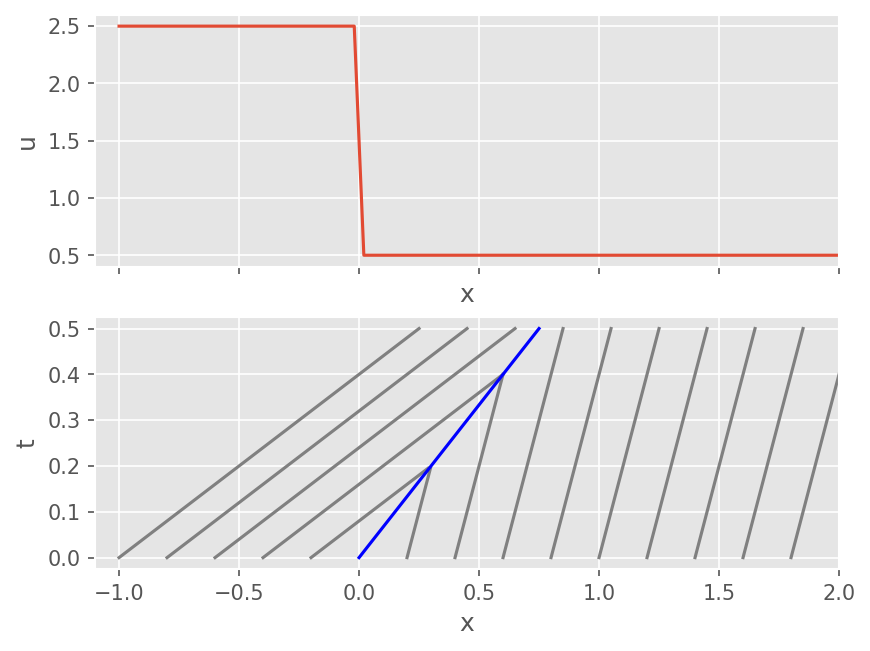

In [3]:
x = np.linspace(-1, 2, 151)
u = -np.tanh(1e8*x) + 1.5
t = np.linspace(0, 0.5, 101)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, u)
axs[0].set_xlim(-1.1, 2)
axs[0].set_ylabel('u')
axs[0].set_xlabel('x')

xs = 1.5*t

for i in range(15):
    xi, ui = x[10*i], u[10*i]
    
    # Characteristics with the wave speed u
    xx = xi + ui*t
    
    # Do not draw characteristics after shcok
    idx1 = np.argmin(xx < xs)
    idx2 = np.argmax(xx < xs)
    
    if idx1 + idx2 == 0:
        if xi != 0:
            axs[1].plot(xx, t, color='gray') 
    else:
        if idx1 > 0:
            axs[1].plot(xx[:idx1], t[:idx1], color='gray') 
        else:
            axs[1].plot(xx[:idx2], t[:idx2], color='gray') 
    
# Rankine Hugoniot condtion
axs[1].plot(xs, t, color='blue')

axs[1].set_ylabel('t')
axs[1].set_xlabel('x')

### Rarefaction
$u_L < u_R$ 인 경우 해는 연속적으로 팽창한다. 이 때 해는 $x/t$ 에 Self-similar 하다. 현재 시간과 경계에 대한 국소 좌표계를 $\hat{t}$, $\hat{x}$ 에 대해서 Self-similar 한 해 $\hat{u}$는 다음과 같다.

$$
\hat{u} \left (
\frac{\hat{x}}{\hat{t}}
\right )
= \left \{
\begin{array}[cc]
1u_L & \hat{x}/\hat{t} < u_L \\
\frac{\hat{x}}{\hat{t}} & u_L  < \hat{x}/\hat{t} < u_R \\
u_R & \hat{x}/\hat{t} > u_R \\
\end{array}
\right.
$$

Text(0.5, 0, 'x')

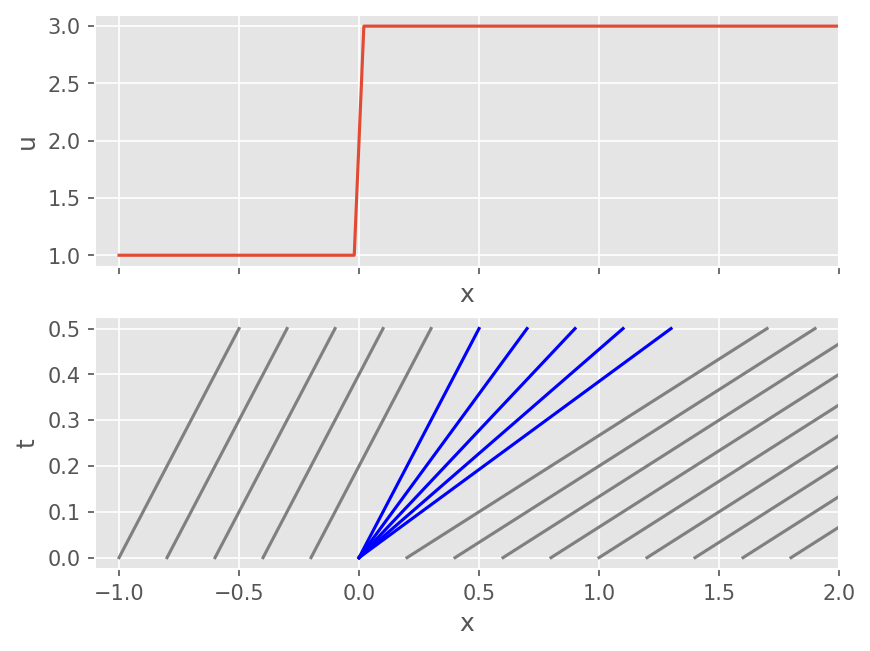

In [4]:
x = np.linspace(-1, 2, 151)
u = np.tanh(1e8*x) + 2
t = np.linspace(0, 0.5, 101)

fig, axs = plt.subplots(2, 1, sharex=True)
axs[0].plot(x, u)
axs[0].set_xlim(-1.1, 2)
axs[0].set_ylabel('u')
axs[0].set_xlabel('x')

for i in range(15):
    xi, ui = x[10*i], u[10*i]
    
    # Characteristics with the wave speed u
    xx = xi + ui*t
    
    if xi != 0:
        axs[1].plot(xx, t, color='gray') 

# Expansion fan        
for i in range(5):
    axs[1].plot((1+2/5*i)*t, t, color='blue')

axs[1].set_ylabel('t')
axs[1].set_xlabel('x')

### Entropy Condition
쌍곡 보존식의 해는 팽창파 뿐 아니라 팽창충격파도 존재할 수 있다. 그러나 자연 현상에서는 점성에 의해 팽창파만 존재한다. 즉 엔트로피가 증가하는 방향으로만 해가 존재한다.

Burgers 방정식에서도 Entropy 조건을 만족해야 한다.

볼연속 충격파의 전파 속도는 다음 조건을 만족한다.

$$
f'(u_L) > s > f'(u_R).
$$

## Converavtive vs Non-conservative
- Finite Volume method for conservative form

$$
\frac{\partial u}{\partial t} + \frac{\partial }{\partial x} \left ( \frac{u^2}{2} \right )= 0.
$$

- Finite Difference method for non-conservative form

$$
u_t + uu_x=0.
$$

- (Lax and Wendroff) 수치해가 수렴하기 위해서는 weak form 을 만족해야 한다. 즉 jump condition을 만족해야 한다.

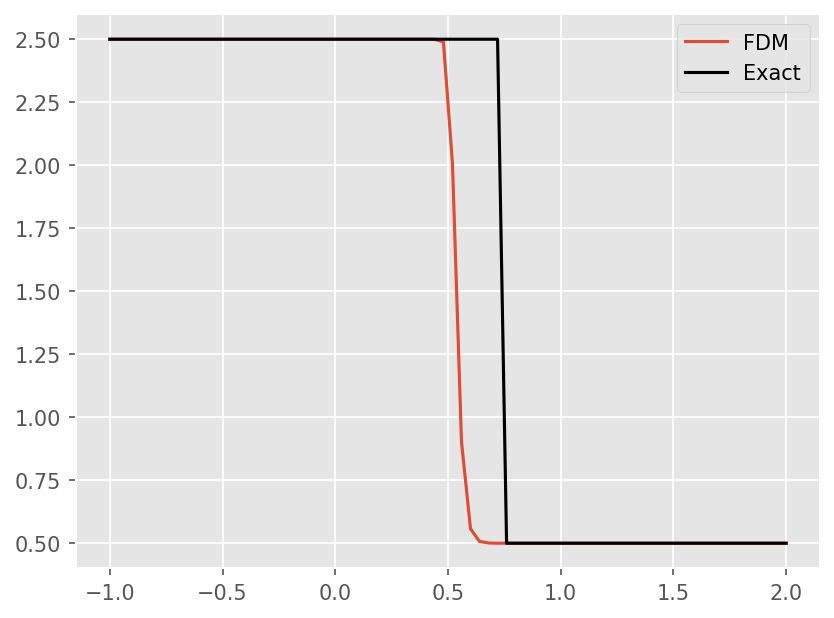

In [5]:
# Finite Difference Method
t_target = 0.5
cfl = 0.9

# Make grid
nx = 75
x = np.linspace(-1, 2, nx+1)
dx = np.diff(x)[0]

# Solution array
u = np.empty(nx+3)
du = np.zeros_like(u)

# Upwind scheme
def upwind(nx, u, du, dt, dx):
    for i in range(1, nx+2):
        du[i] = -u[i] * (u[i] - u[i-1])*dt/dx

# Transparent BC
def bc_transparent(u):
    u[0] = u[1]
    u[-1] = u[-2]

# Initialize
u[1:-1] =  -np.tanh(1e8*x) + 1.5
bc_transparent(u)

# Calculation
t = 0
while abs(t - t_target) > 1e-8:    
    # Adjust time step to reach target time
    dt = cfl*dx / abs(u[1:-1]).max()
    dt = min(dt, t_target - t)
    
    # Periodic BC
    bc_transparent(u)
    
    # Non-conservative Upwind
    upwind(nx, u, du, dt, dx)
    
    # Update
    u += du
    t += dt

# Plot solution
plt.plot(x, u[1:-1])

# Plot exact
s = 0.5*(u[0] + u[-1])
plt.plot(x, -np.tanh(1e8*(x - s*t)) + 1.5, color='k')

plt.legend(['FDM', 'Exact'])

In [6]:
# Finite Volume Method
t_target = 0.5
cfl = 0.9

# Make grid
nx = 75
x = np.linspace(-1, 2, nx+1)
dx = np.diff(x)[0]
xc = x[:-1] + 0.5*dx 

# Solution and flux array
u = np.empty(nx+2)
f = np.empty(nx+1)

# Upwind flux
eps = 1e-10

def upwind(nx, u, f):
    for j in range(nx+1):
        ul, ur = u[j], u[j+1]
        
        fl = 0.5*ul**2
        fr = 0.5*ur**2
    
        s = (fr - fl + eps) / (ur - ul + eps)
        
        f[j] = (fl + fr)/2 - abs(s)/2*(ur - ul)

# Initialize
u[1:-1] =  -np.tanh(1e8*xc) + 1.5

# Calculation
t = 0
while abs(t - t_target) > 1e-8:    
    # Adjust time step to reach target time
    dt = cfl*dx / abs(u[1:-1]).max()
    dt = min(dt, t_target - t)
    
    # Periodic BC
    bc_transparent(u)
    
    # Compute Flux
    upwind(nx, u, f)
    
    # Update solution and time
    u[1:-1] -= dt/dx * (f[1:] - f[:-1])
    t += dt

# Plot solution
plt.plot(xc, u[1:-1])

# Plot exact
s = 0.5*(u[0] + u[-1])
plt.plot(x, -np.tanh(1e8*(x - s*t)) + 1.5, color='k')

plt.legend(['FVM', 'Exact'])

## 예제
Burgers 방정식을 생각하자.

$$
\frac{\partial u}{\partial t} + \frac{\partial }{\partial x} \left ( \frac{u^2}{2} \right )= 0.
$$

계산 영역은 $[-1,1]$ 이다. 아래 유동을 유한체적법으로 계산하시오. Flux 기법은 Upwind를 사용하시오.

1) 아래 초기 조건에 대해서 Tranparent 경계 조건이고 $t=0.5$ 일 때 계산하시오. Rankine-Hugoniot 조건을 이용해서 충격파의 Wave speed를 예측하는지 확인하시오.

    $$
    u(x,0) = \left \{
    \begin{array}{cc} 
    1.5 & x \le 0 \\
    0.5 & else 
    \end{array}
    \right.
    $$

2) 아래 초기 조건에 대해서 Tranparent 경계 조건이고 $t=0.5$ 일 때 계산하시오. Entropy 조건을 만족하는지 확인하시오.

    $$
    u(x,0) = \left \{
    \begin{array}{cc} 
    0.5 & x \le 0 \\
    1.5 & else 
    \end{array}
    \right.
    $$

3) 초기 조건이 $u(x,0) = 1 + 0.5 \sin(\pi x)$ Periodic 경계조건 인 경우 $t=0.5, 1.0, 1.5$ 일 때 계산하시오. $x-t$ 그래프를 그려보고 수치해와 이론해를 비교 분석하시오.


다음과 같이 조건을 변경하면서 계산하시오.

- CFL 수를 바꿔가면서 계산하시오.

- 격자 개수 ($nx=50, 100, 200, 400$)를 다르게 하면서 변화를 확인하시오.